# Experiment 2: Results across values of $\alpha$ in dimension 2

In this notebook, we show results corresponding to Experiment 2, described in the thesis report. Specifically, we present the fidelities and accuracies of the copies (SNN, MNN, LNN, and GB, appearing in this order for each black box) across different values of $\alpha \in \{0,0.25,0.5,0.75,1,1.25\}$ in the two-dimensional datasets, for each of the 3 different black box models considered in the experiment, comparing them to the corresponding metrics achieved by the hard copies. All copies were trained on the same 1,000,000 synthetic samples generated with Algorithm 2.

As a remark, all metrics and plots shown below have been averaged across five different seeds (41, 42, 43, 44, and 45), aiming to increase their reliability and significance.

In [1]:
# All necessary imports
import numpy as np
import os
import pandas as pd
import types
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from time import perf_counter
from sklearn.ensemble import HistGradientBoostingClassifier, HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import matplotlib.colors as mcolors
import pickle
import random
from tensorflow.keras.models import save_model, load_model
from tensorflow.keras import Model as KerasModel
from scipy.interpolate import interp1d

original_cwd = os.getcwd()
os.chdir('../utils')
from utils import *
os.chdir(original_cwd)

In [2]:
# Set the seed
seed = 42
random.seed(seed)
np.random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
tf.random.set_seed(seed)
tf.keras.utils.set_random_seed(seed)
tf.config.experimental.enable_op_determinism()

# Create a wrapper for our Neural network black boxes
def bbmodelW(x):
    if isinstance(bbmodel, tf.keras.models.Model):
        return np.where(bbmodel(x) > 0.5, 1, -1).flatten()
    return np.where(bbmodel.predict(x) > 0.5, 1, -1).flatten()

## Overlapping Gaussians dataset

### Black box 1: Random Forest classifier

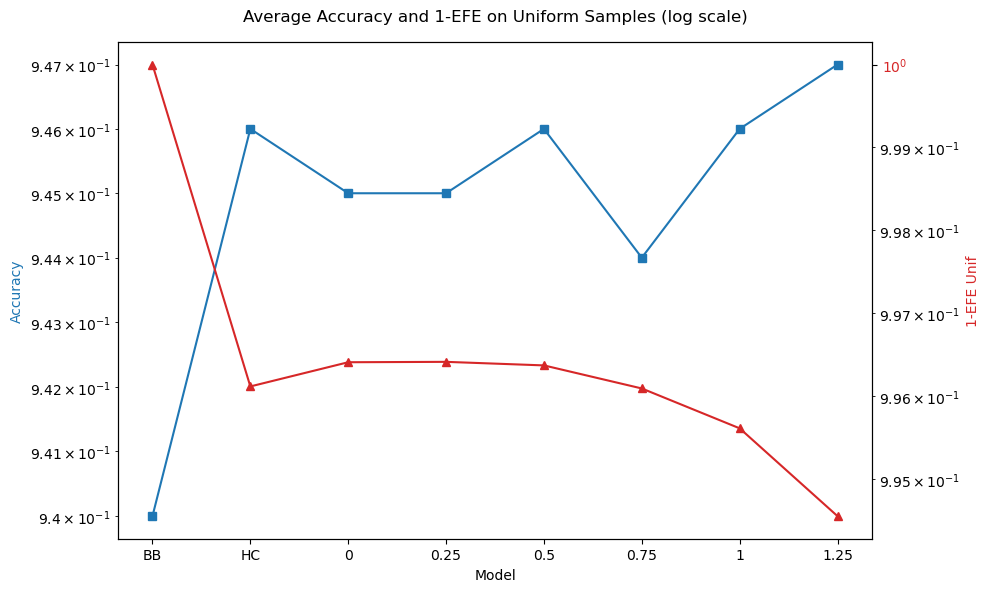


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB           0.940        0.000000    1.000000
   HC           0.946        0.003884    0.996116
    0           0.945        0.003593    0.996407
 0.25           0.945        0.003588    0.996412
  0.5           0.946        0.003631    0.996369
 0.75           0.944        0.003909    0.996091
    1           0.946        0.004389    0.995611
 1.25           0.947        0.005445    0.994555


In [3]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS1_1_1_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

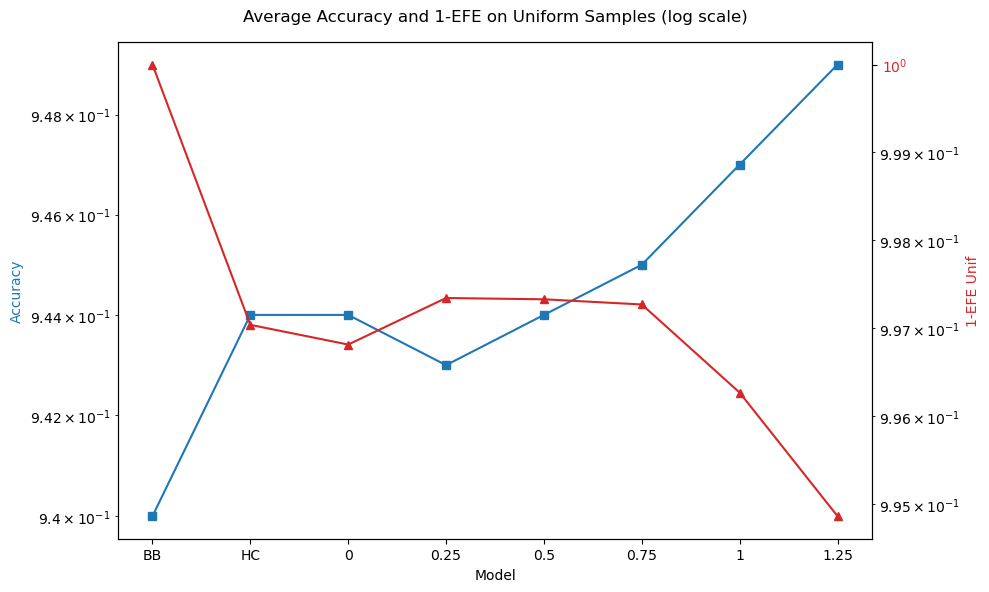


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB           0.940        0.000000    1.000000
   HC           0.944        0.002963    0.997037
    0           0.944        0.003187    0.996813
 0.25           0.943        0.002658    0.997342
  0.5           0.944        0.002672    0.997328
 0.75           0.945        0.002731    0.997269
    1           0.947        0.003733    0.996267
 1.25           0.949        0.005135    0.994865


In [4]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS1_1_2_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

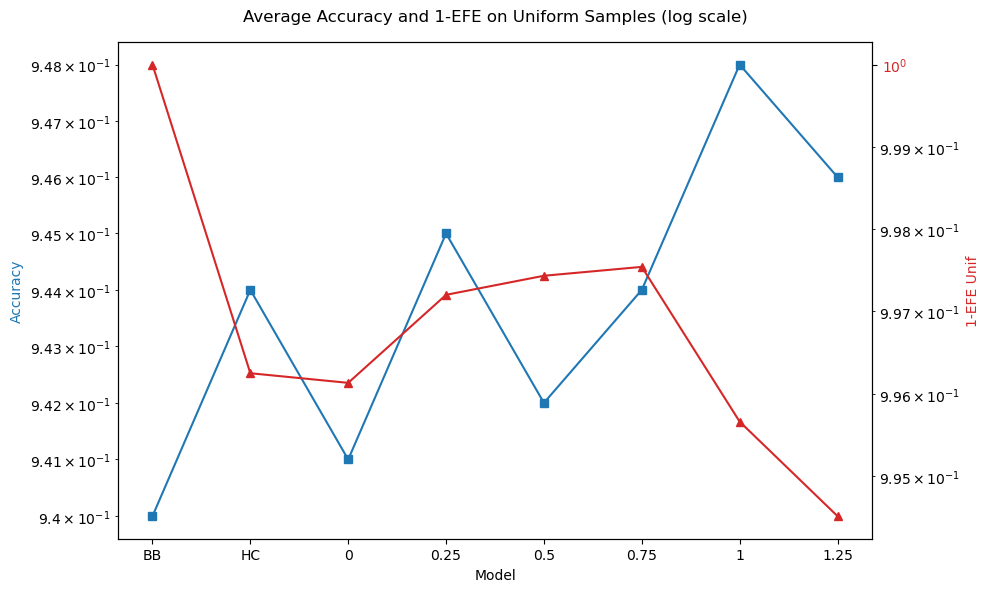


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB           0.940        0.000000    1.000000
   HC           0.944        0.003751    0.996249
    0           0.941        0.003868    0.996132
 0.25           0.945        0.002800    0.997200
  0.5           0.942        0.002568    0.997432
 0.75           0.944        0.002460    0.997540
    1           0.948        0.004338    0.995662
 1.25           0.946        0.005483    0.994517


In [5]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS1_1_3_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

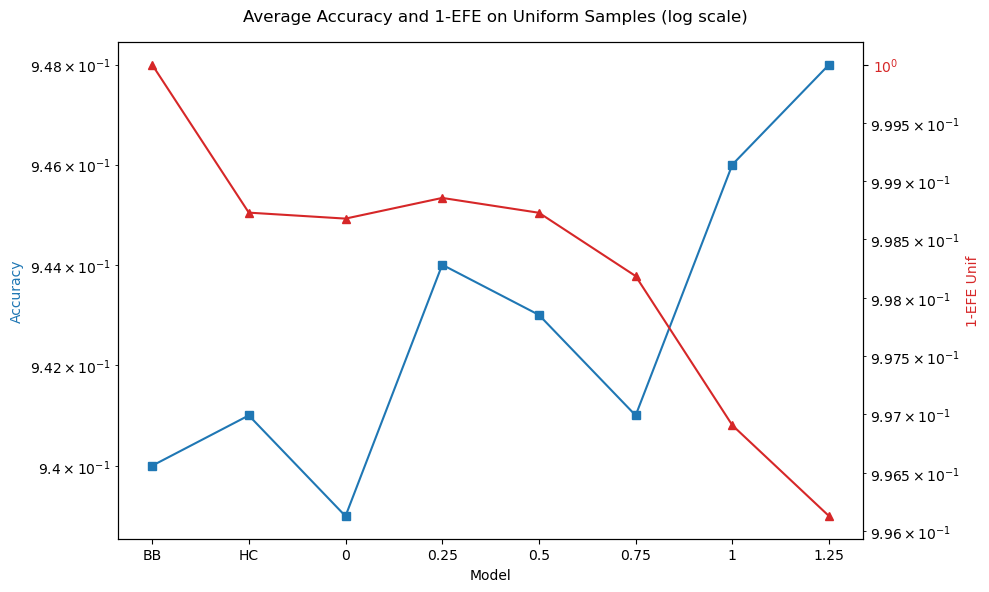


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB           0.940        0.000000    1.000000
   HC           0.941        0.001271    0.998729
    0           0.939        0.001322    0.998678
 0.25           0.944        0.001144    0.998856
  0.5           0.943        0.001272    0.998728
 0.75           0.941        0.001815    0.998185
    1           0.946        0.003093    0.996907
 1.25           0.948        0.003870    0.996130


In [6]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS1_1_4_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

### Black box 2: Gradient Boosting classifier

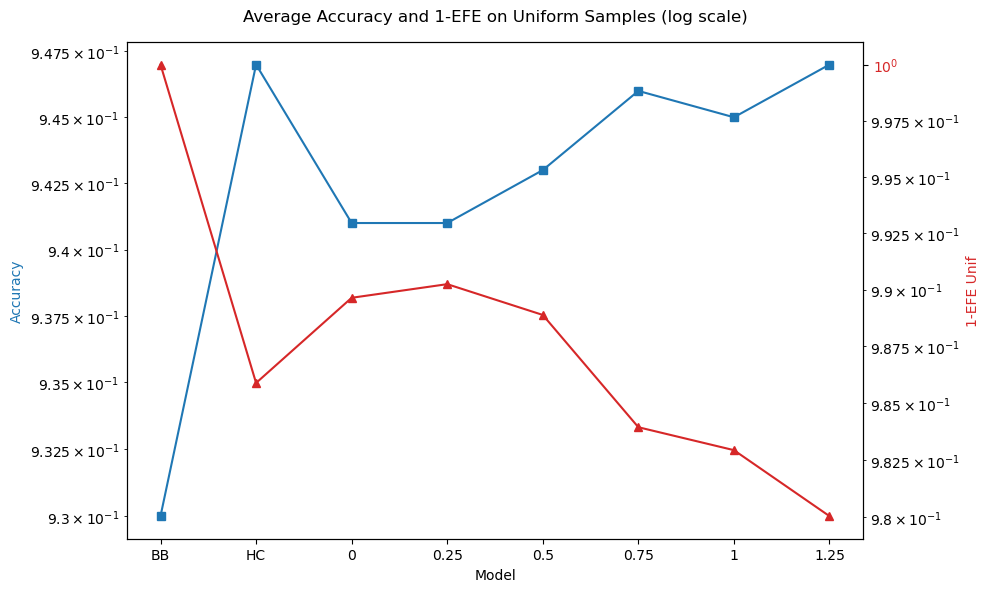


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB           0.930        0.000000    1.000000
   HC           0.947        0.014115    0.985885
    0           0.941        0.010359    0.989641
 0.25           0.941        0.009756    0.990244
  0.5           0.943        0.011117    0.988883
 0.75           0.946        0.016062    0.983938
    1           0.945        0.017068    0.982932
 1.25           0.947        0.019960    0.980040


In [7]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS1_2_1_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

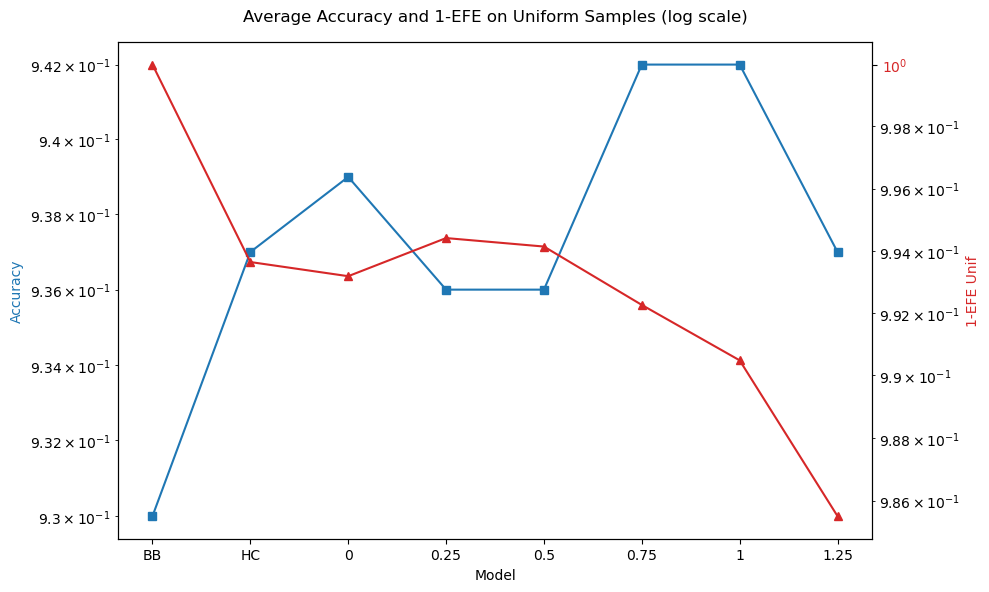


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB           0.930        0.000000    1.000000
   HC           0.937        0.006364    0.993636
    0           0.939        0.006819    0.993181
 0.25           0.936        0.005593    0.994407
  0.5           0.936        0.005866    0.994134
 0.75           0.942        0.007741    0.992259
    1           0.942        0.009517    0.990483
 1.25           0.937        0.014494    0.985506


In [8]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS1_2_2_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

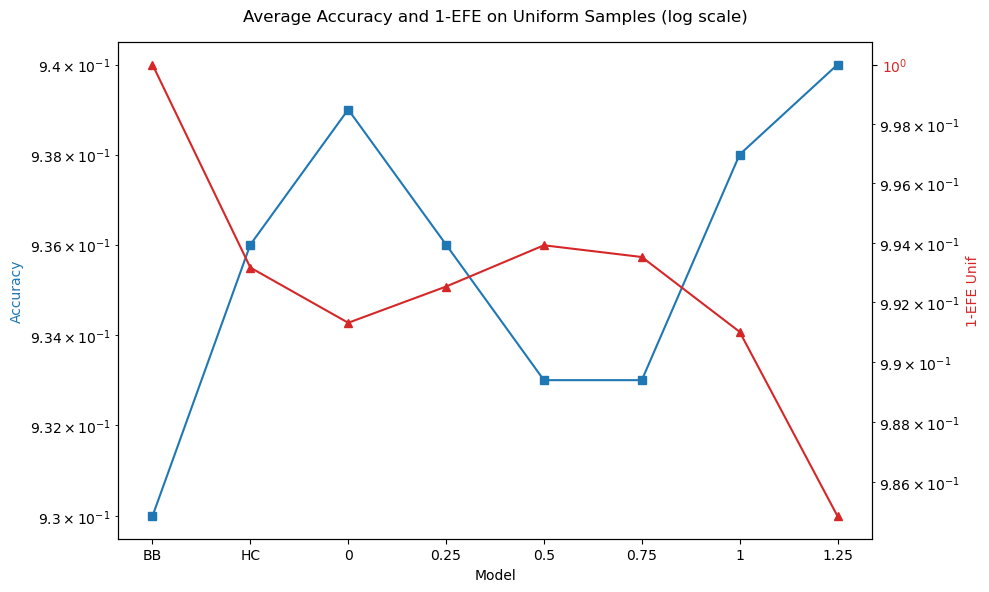


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB           0.930        0.000000    1.000000
   HC           0.936        0.006834    0.993166
    0           0.939        0.008685    0.991315
 0.25           0.936        0.007471    0.992529
  0.5           0.933        0.006086    0.993914
 0.75           0.933        0.006480    0.993520
    1           0.938        0.008989    0.991011
 1.25           0.940        0.015139    0.984861


In [9]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS1_2_3_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

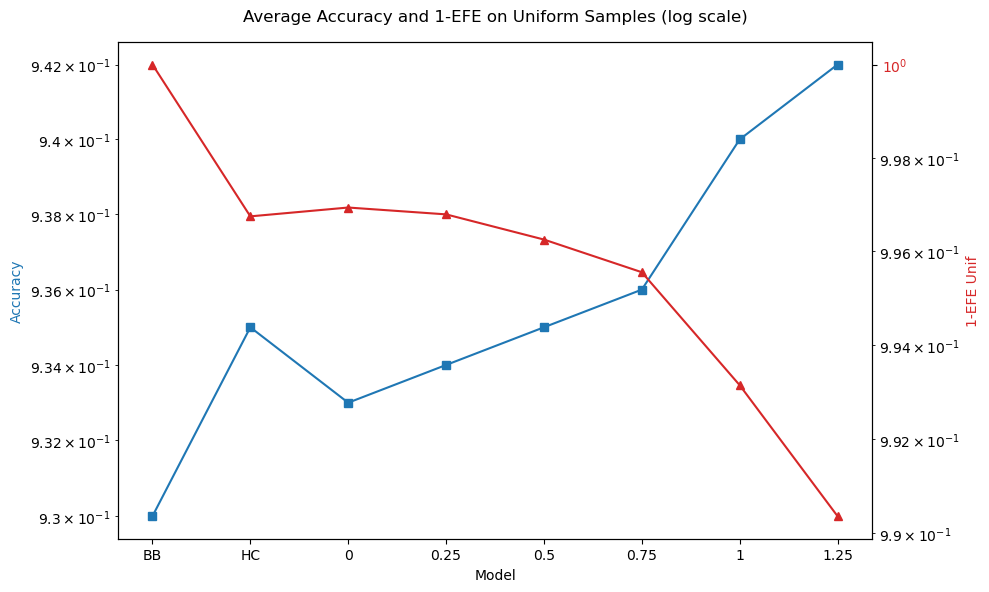


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB           0.930        0.000000    1.000000
   HC           0.935        0.003249    0.996751
    0           0.933        0.003061    0.996939
 0.25           0.934        0.003207    0.996793
  0.5           0.935        0.003745    0.996255
 0.75           0.936        0.004443    0.995557
    1           0.940        0.006851    0.993149
 1.25           0.942        0.009636    0.990364


In [10]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS1_2_4_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

### Black box 3: Neural Network classifier

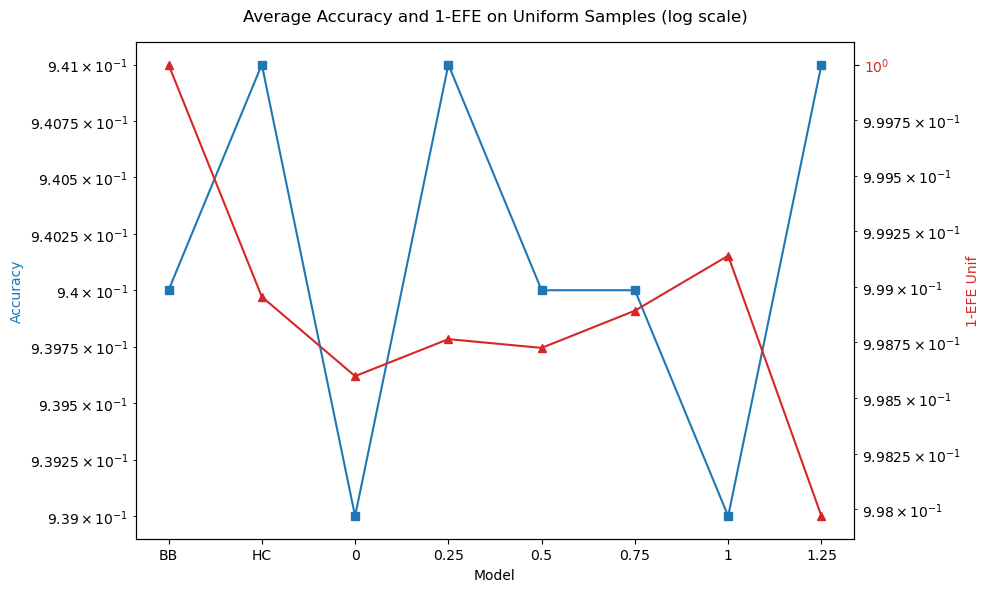


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB           0.940        0.000000    1.000000
   HC           0.941        0.001045    0.998955
    0           0.939        0.001401    0.998599
 0.25           0.941        0.001235    0.998765
  0.5           0.940        0.001274    0.998726
 0.75           0.940        0.001107    0.998893
    1           0.939        0.000860    0.999140
 1.25           0.941        0.002030    0.997970


In [11]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS1_3_1_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

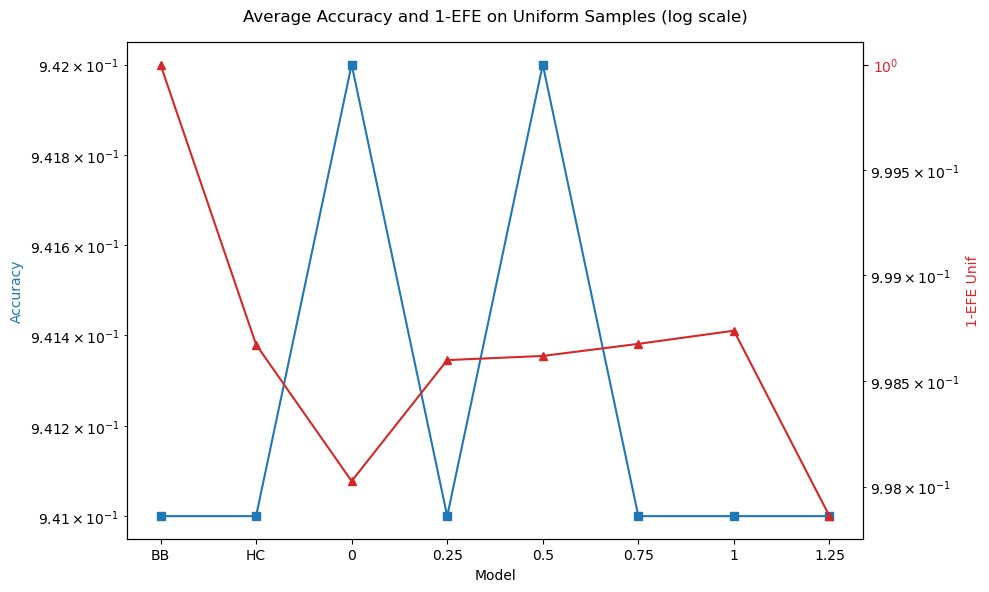


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB           0.941        0.000000    1.000000
   HC           0.941        0.001327    0.998673
    0           0.942        0.001974    0.998026
 0.25           0.941        0.001401    0.998599
  0.5           0.942        0.001381    0.998619
 0.75           0.941        0.001324    0.998676
    1           0.941        0.001262    0.998738
 1.25           0.941        0.002140    0.997860


In [12]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS1_3_2_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

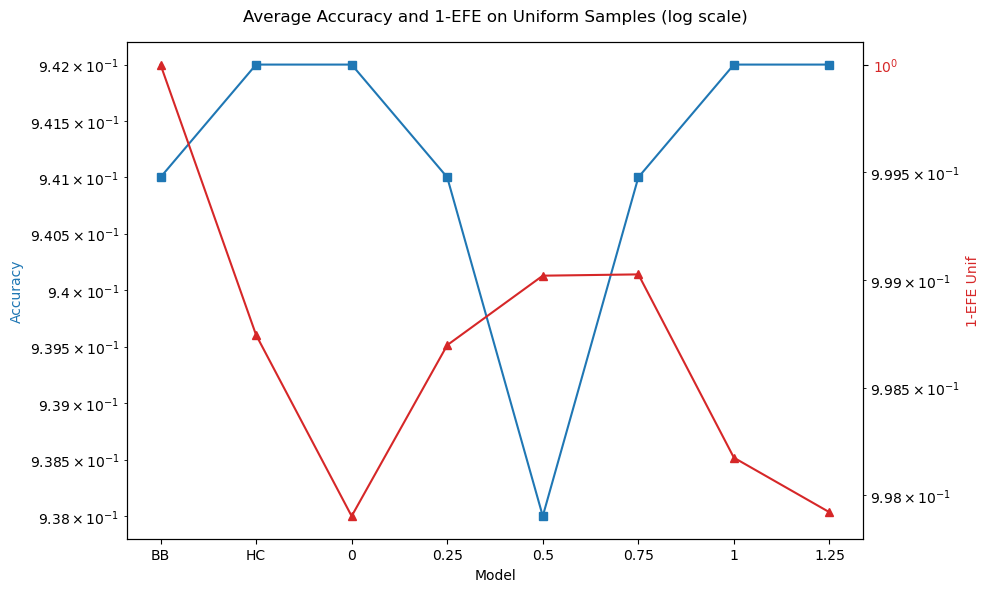


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB           0.941        0.000000    1.000000
   HC           0.942        0.001256    0.998744
    0           0.942        0.002096    0.997904
 0.25           0.941        0.001303    0.998697
  0.5           0.938        0.000981    0.999019
 0.75           0.941        0.000975    0.999025
    1           0.942        0.001825    0.998175
 1.25           0.942        0.002078    0.997922


In [13]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS1_3_3_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

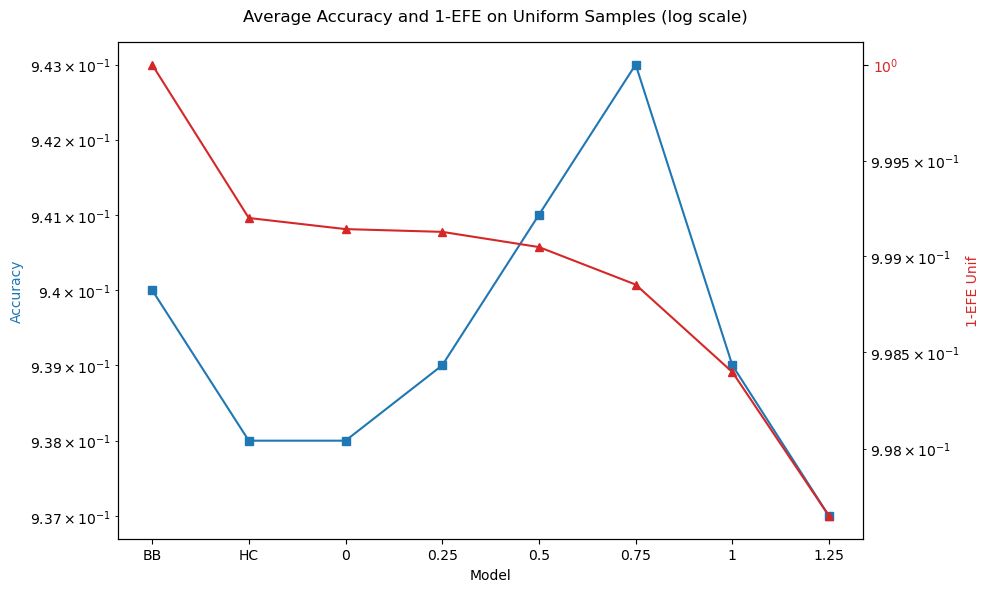


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB           0.940        0.000000    1.000000
   HC           0.938        0.000800    0.999200
    0           0.938        0.000857    0.999143
 0.25           0.939        0.000872    0.999128
  0.5           0.941        0.000951    0.999049
 0.75           0.943        0.001146    0.998854
    1           0.939        0.001602    0.998398
 1.25           0.937        0.002352    0.997648


In [14]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS1_3_4_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

## Two spirals dataset

### Black box 1: Random Forest classifier

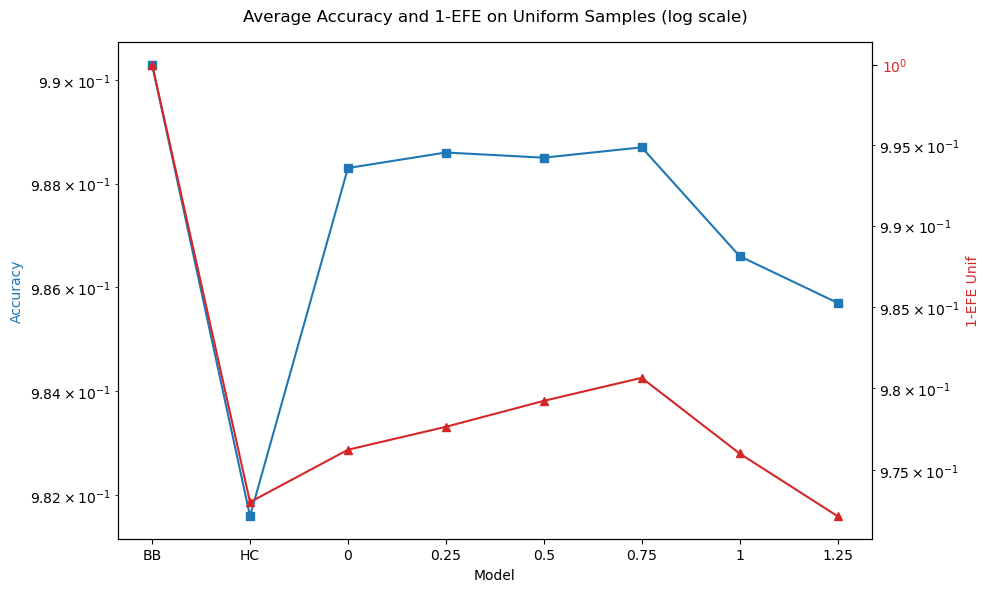


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB          0.9903        0.000000    1.000000
   HC          0.9816        0.026936    0.973064
    0          0.9883        0.023752    0.976248
 0.25          0.9886        0.022353    0.977647
  0.5          0.9885        0.020768    0.979232
 0.75          0.9887        0.019360    0.980640
    1          0.9866        0.023979    0.976021
 1.25          0.9857        0.027789    0.972211


In [15]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS2_1_1_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

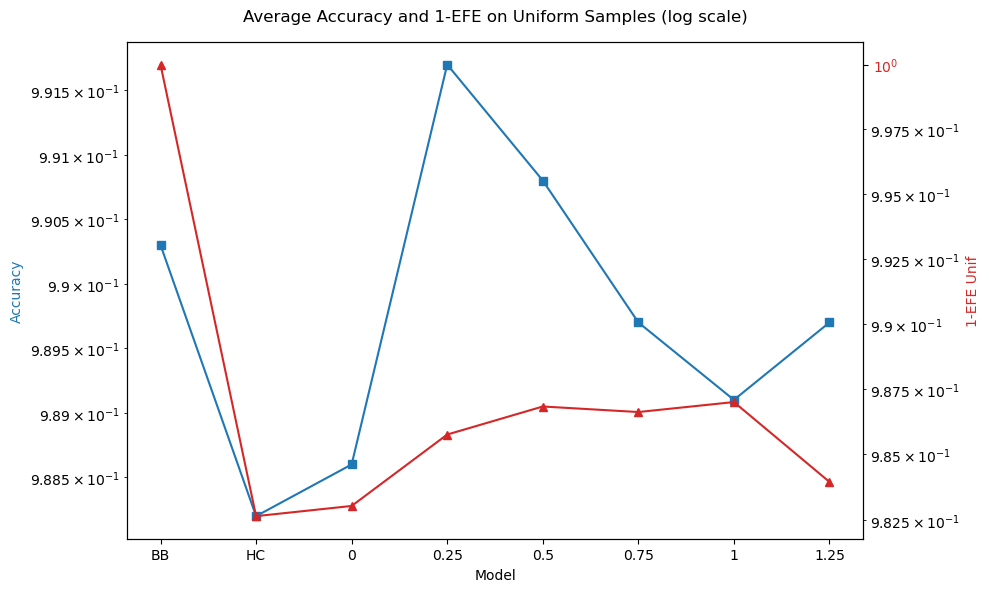


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB          0.9903        0.000000    1.000000
   HC          0.9882        0.017353    0.982647
    0          0.9886        0.016965    0.983035
 0.25          0.9917        0.014240    0.985760
  0.5          0.9908        0.013168    0.986832
 0.75          0.9897        0.013379    0.986621
    1          0.9891        0.012998    0.987002
 1.25          0.9897        0.016049    0.983951


In [16]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS2_1_2_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

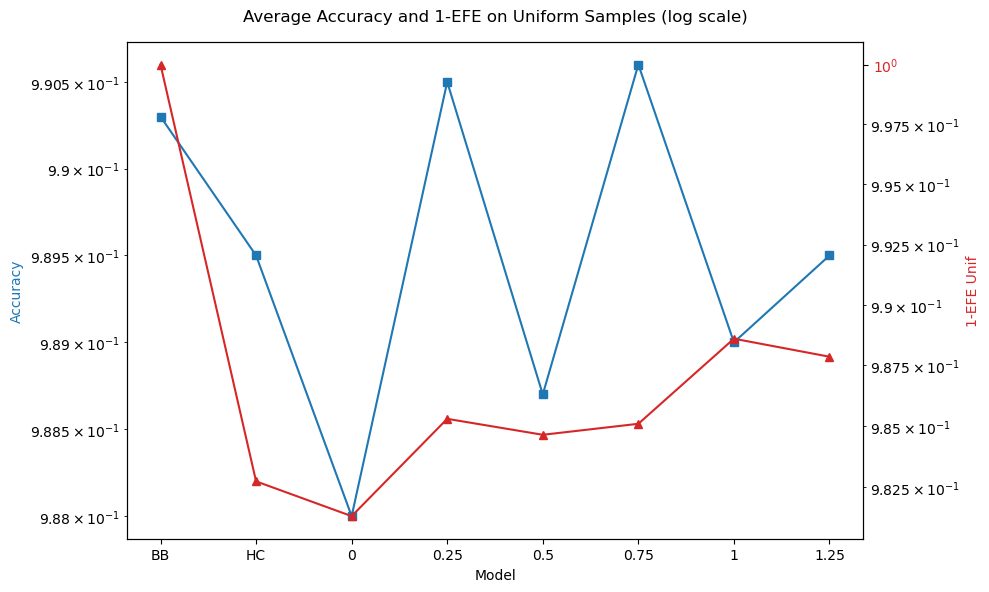


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB          0.9903        0.000000    1.000000
   HC          0.9895        0.017280    0.982720
    0          0.9880        0.018708    0.981292
 0.25          0.9905        0.014706    0.985294
  0.5          0.9887        0.015364    0.984636
 0.75          0.9906        0.014911    0.985089
    1          0.9890        0.011399    0.988601
 1.25          0.9895        0.012144    0.987856


In [17]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS2_1_3_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

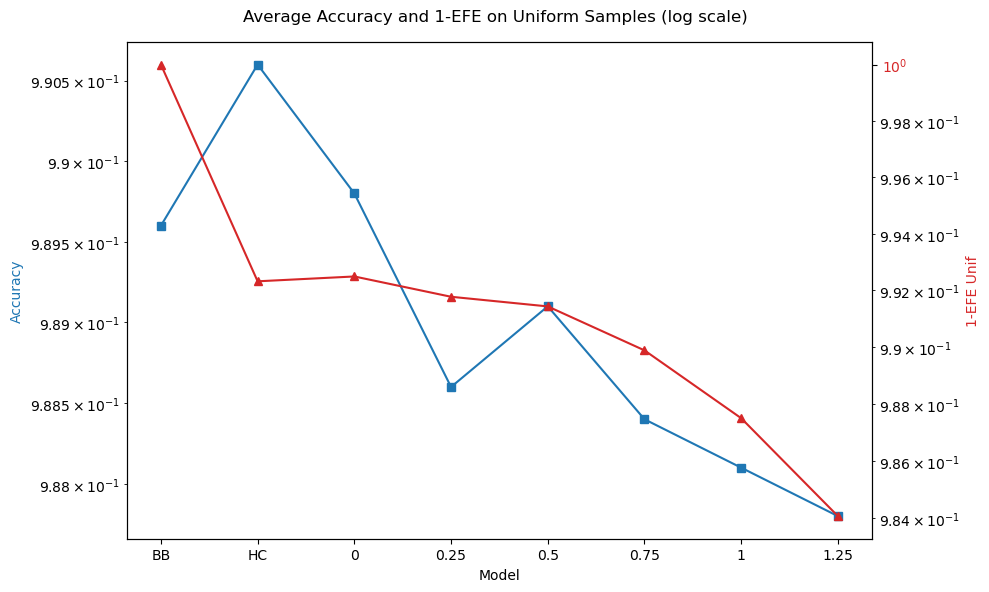


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB          0.9896        0.000000    1.000000
   HC          0.9906        0.007678    0.992322
    0          0.9898        0.007507    0.992493
 0.25          0.9886        0.008224    0.991776
  0.5          0.9891        0.008564    0.991436
 0.75          0.9884        0.010112    0.989888
    1          0.9881        0.012498    0.987502
 1.25          0.9878        0.015931    0.984069


In [18]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS2_1_4_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

### Black box 2: Gradient Boosting classifier

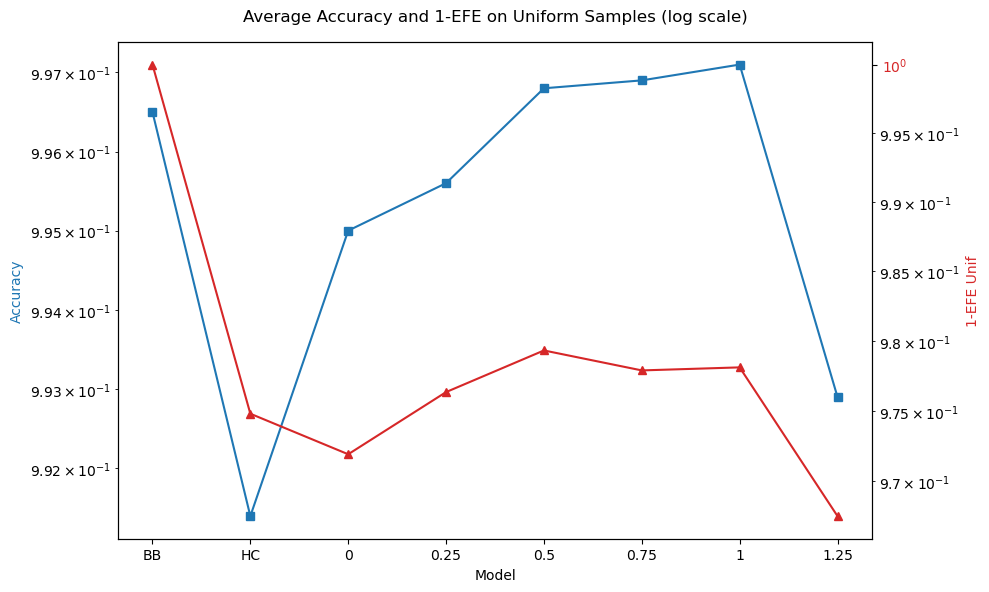


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB          0.9965        0.000000    1.000000
   HC          0.9914        0.025191    0.974809
    0          0.9950        0.028075    0.971925
 0.25          0.9956        0.023649    0.976351
  0.5          0.9968        0.020674    0.979326
 0.75          0.9969        0.022102    0.977898
    1          0.9971        0.021885    0.978115
 1.25          0.9929        0.032461    0.967539


In [19]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS2_2_1_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

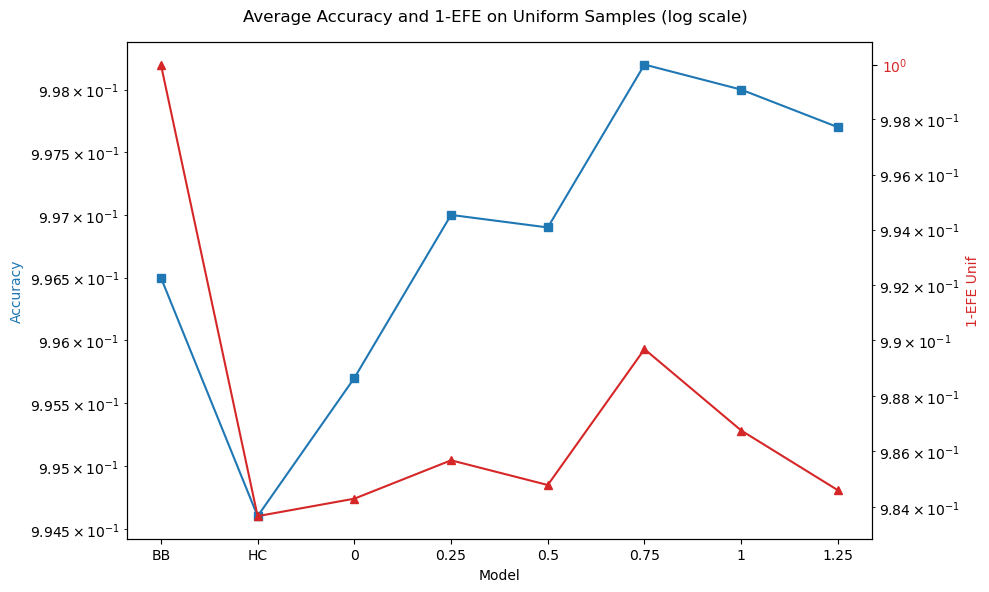


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB          0.9965        0.000000    1.000000
   HC          0.9946        0.016327    0.983673
    0          0.9957        0.015701    0.984299
 0.25          0.9970        0.014323    0.985677
  0.5          0.9969        0.015210    0.984790
 0.75          0.9982        0.010321    0.989679
    1          0.9980        0.013252    0.986748
 1.25          0.9977        0.015398    0.984602


In [20]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS2_2_2_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

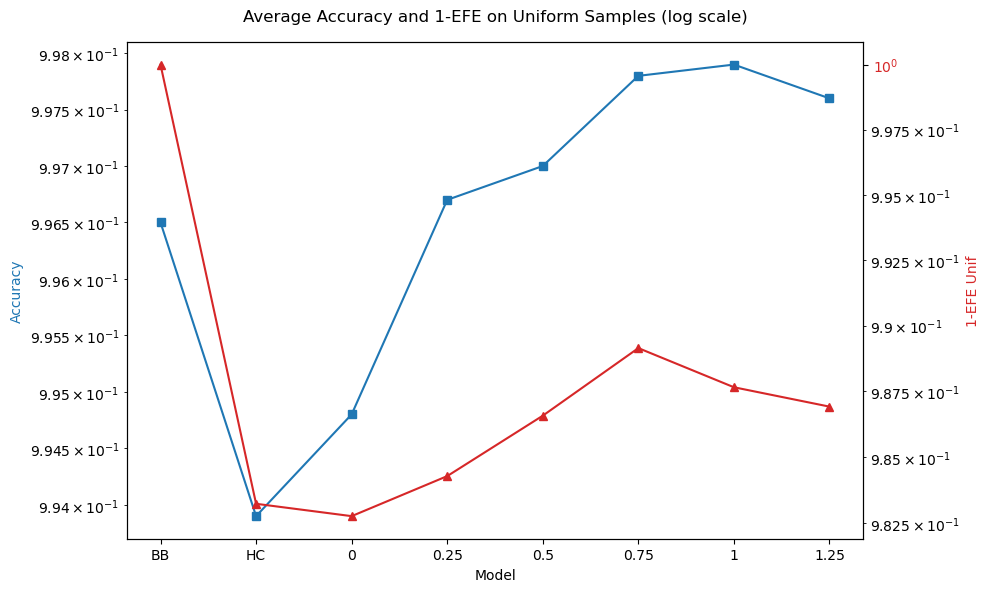


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB          0.9965        0.000000    1.000000
   HC          0.9939        0.016769    0.983231
    0          0.9948        0.017237    0.982763
 0.25          0.9967        0.015721    0.984279
  0.5          0.9970        0.013428    0.986572
 0.75          0.9978        0.010858    0.989142
    1          0.9979        0.012348    0.987652
 1.25          0.9976        0.013084    0.986916


In [21]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS2_2_3_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

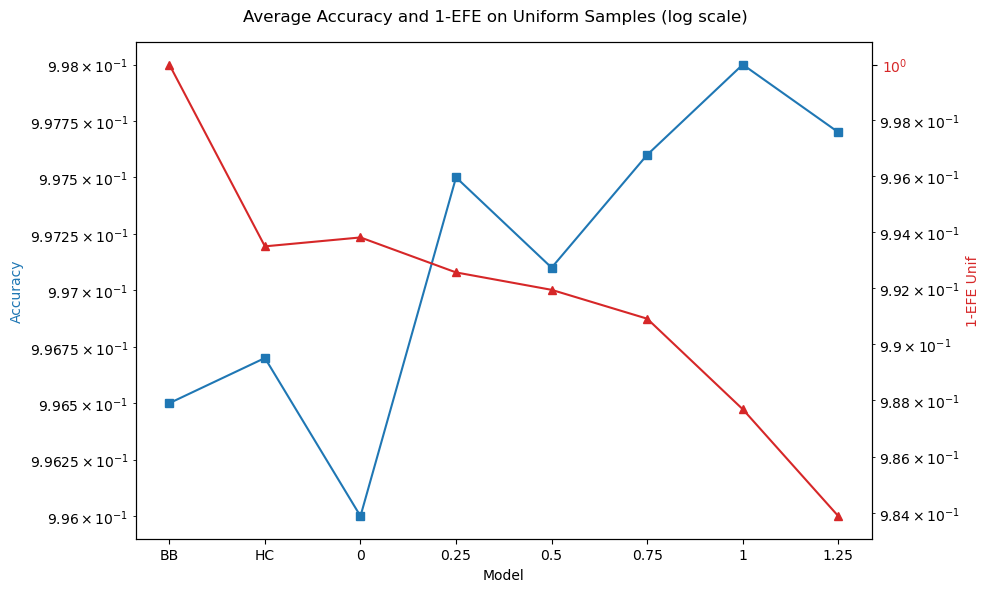


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB          0.9965        0.000000    1.000000
   HC          0.9967        0.006515    0.993485
    0          0.9960        0.006197    0.993803
 0.25          0.9975        0.007447    0.992553
  0.5          0.9971        0.008068    0.991932
 0.75          0.9976        0.009097    0.990903
    1          0.9980        0.012318    0.987682
 1.25          0.9977        0.016108    0.983892


In [22]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS2_2_4_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

### Black box 3: Neural Network classifier

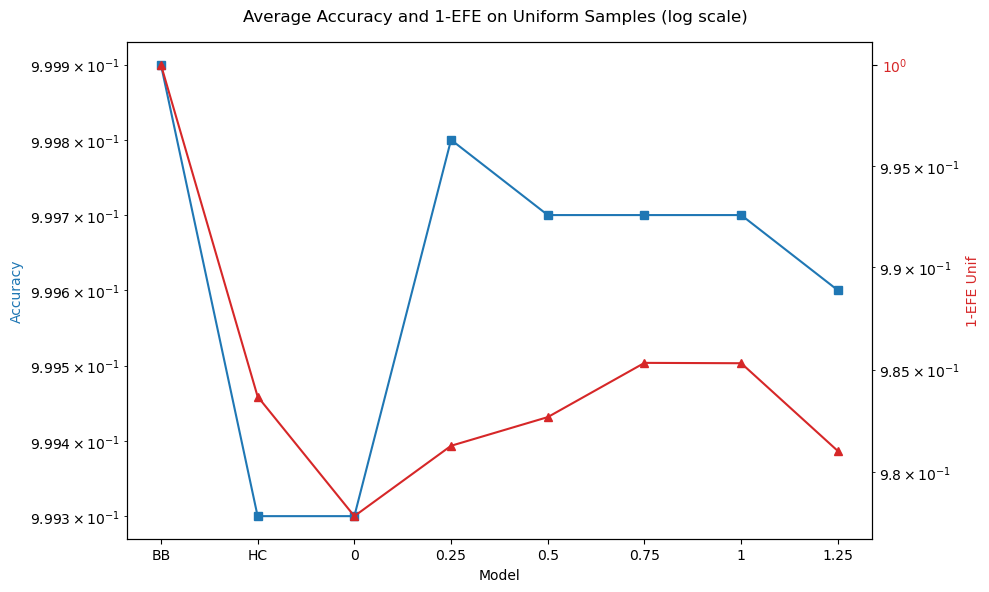


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB          0.9999        0.000000    1.000000
   HC          0.9993        0.016318    0.983682
    0          0.9993        0.022130    0.977870
 0.25          0.9998        0.018714    0.981286
  0.5          0.9997        0.017319    0.982681
 0.75          0.9997        0.014674    0.985326
    1          0.9997        0.014691    0.985309
 1.25          0.9996        0.018972    0.981028


In [23]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS2_3_1_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

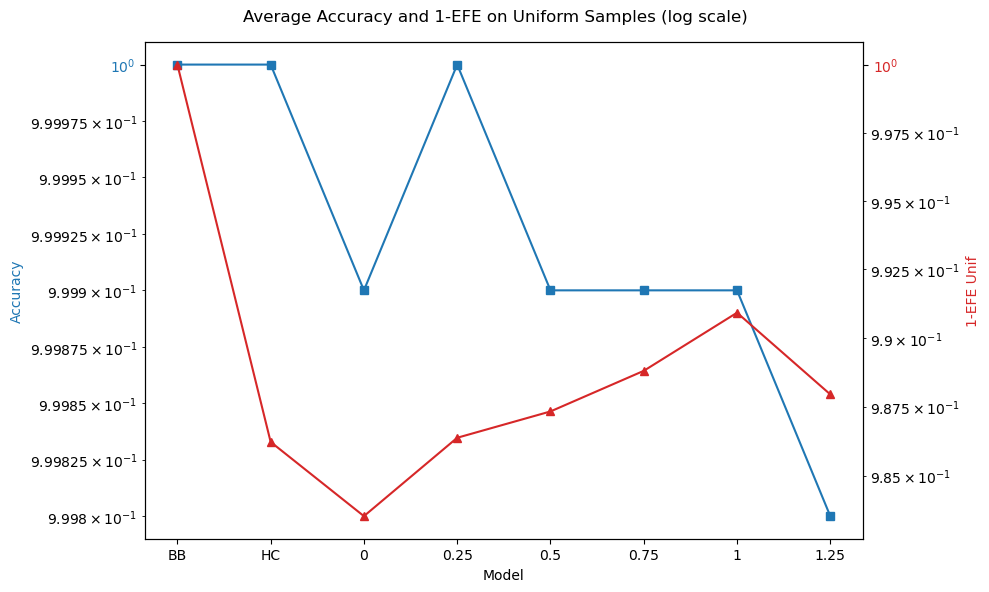


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB          1.0000        0.000000    1.000000
   HC          1.0000        0.013783    0.986217
    0          0.9999        0.016470    0.983530
 0.25          1.0000        0.013631    0.986369
  0.5          0.9999        0.012675    0.987325
 0.75          0.9999        0.011200    0.988800
    1          0.9999        0.009084    0.990916
 1.25          0.9998        0.012056    0.987944


In [24]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS2_3_2_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

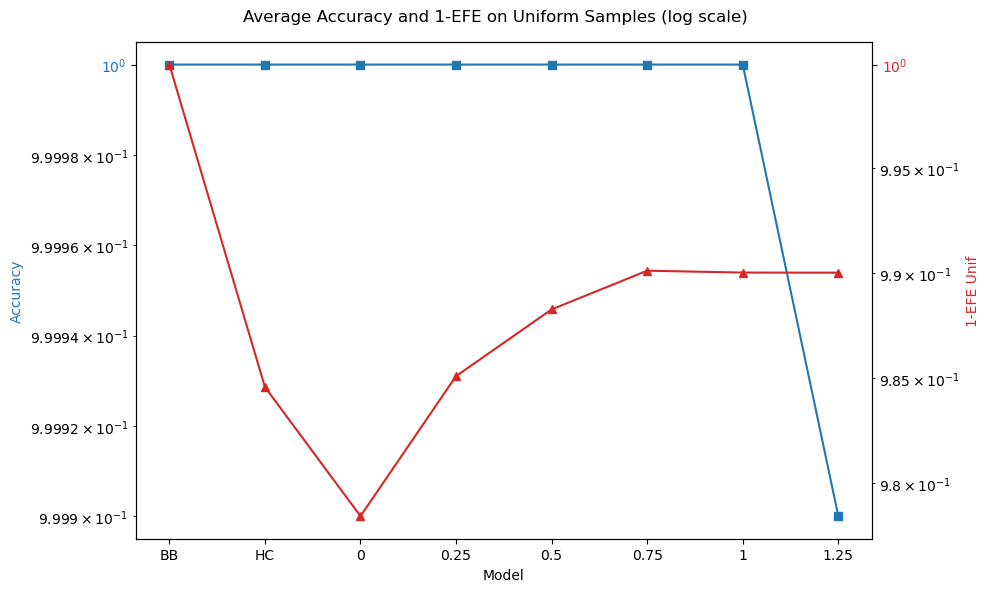


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB          1.0000        0.000000    1.000000
   HC          1.0000        0.015433    0.984567
    0          1.0000        0.021548    0.978452
 0.25          1.0000        0.014917    0.985083
  0.5          1.0000        0.011742    0.988258
 0.75          1.0000        0.009894    0.990106
    1          1.0000        0.009984    0.990016
 1.25          0.9999        0.009988    0.990012


In [25]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS2_3_3_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

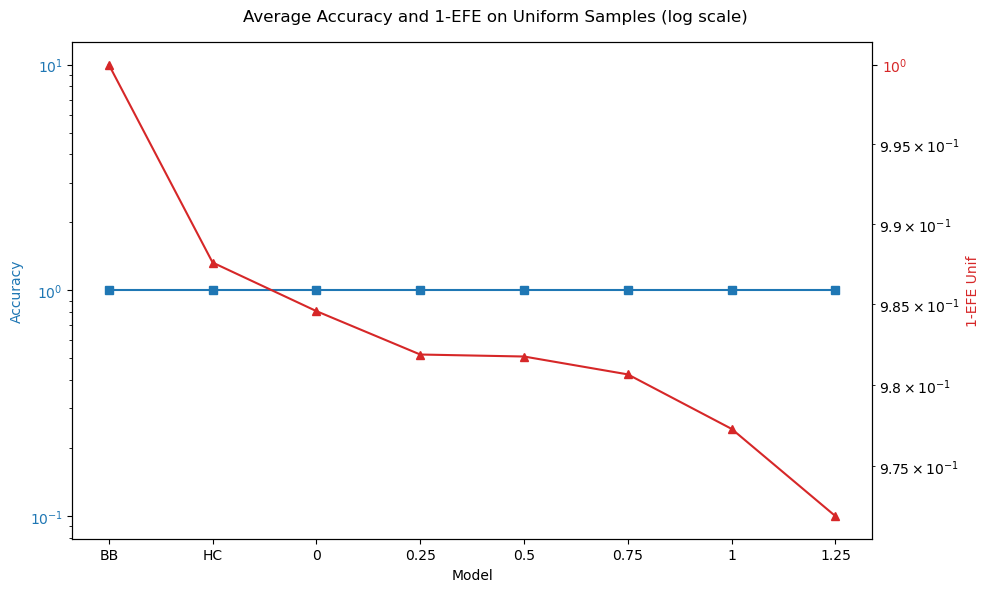


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB             1.0        0.000000    1.000000
   HC             1.0        0.012414    0.987586
    0             1.0        0.015436    0.984564
 0.25             1.0        0.018128    0.981872
  0.5             1.0        0.018252    0.981748
 0.75             1.0        0.019359    0.980641
    1             1.0        0.022725    0.977275
 1.25             1.0        0.028090    0.971910


In [26]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS2_3_4_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

## Space-filling and convoluted dataset

### Black box 1: Random Forest classifier

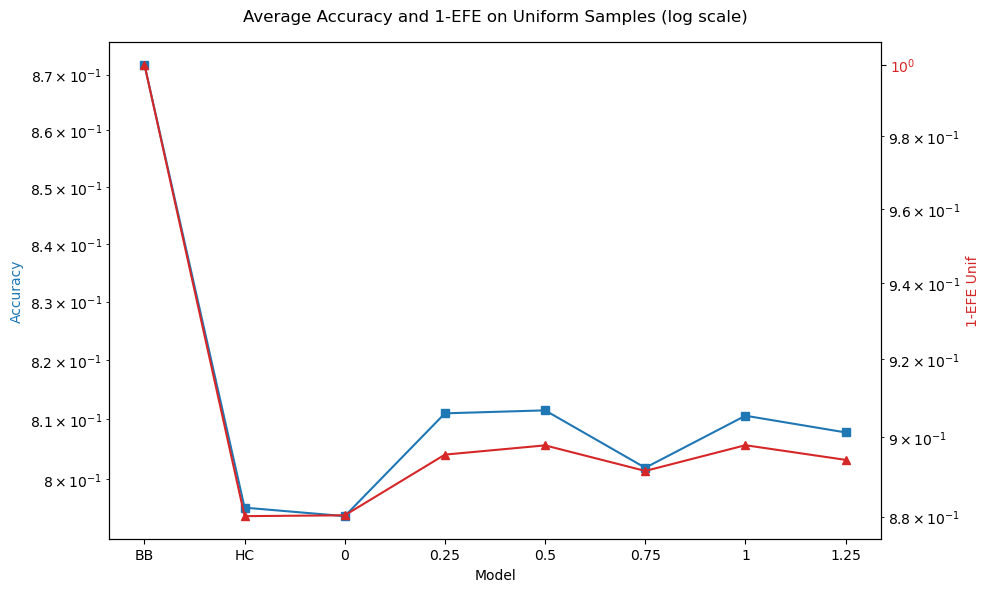


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB          0.8718        0.000000    1.000000
   HC          0.7953        0.119883    0.880117
    0          0.7939        0.119675    0.880325
 0.25          0.8110        0.104435    0.895565
  0.5          0.8115        0.102093    0.897907
 0.75          0.8019        0.108560    0.891440
    1          0.8106        0.102051    0.897949
 1.25          0.8078        0.105764    0.894236


In [27]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS3_1_1_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

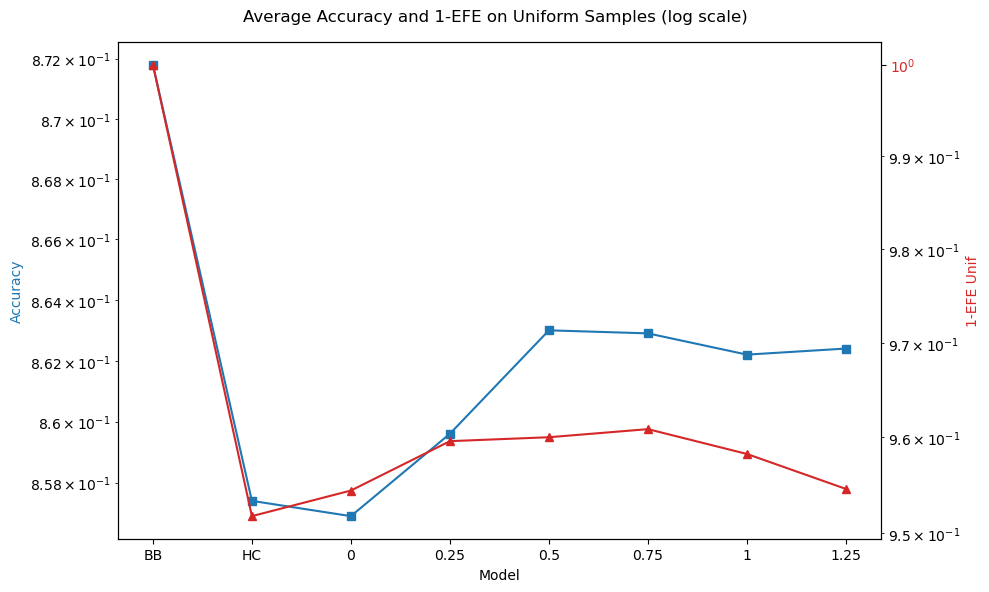


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB          0.8718        0.000000    1.000000
   HC          0.8574        0.048235    0.951765
    0          0.8569        0.045563    0.954437
 0.25          0.8596        0.040389    0.959611
  0.5          0.8630        0.039977    0.960023
 0.75          0.8629        0.039126    0.960874
    1          0.8622        0.041735    0.958265
 1.25          0.8624        0.045396    0.954604


In [28]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS3_1_2_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

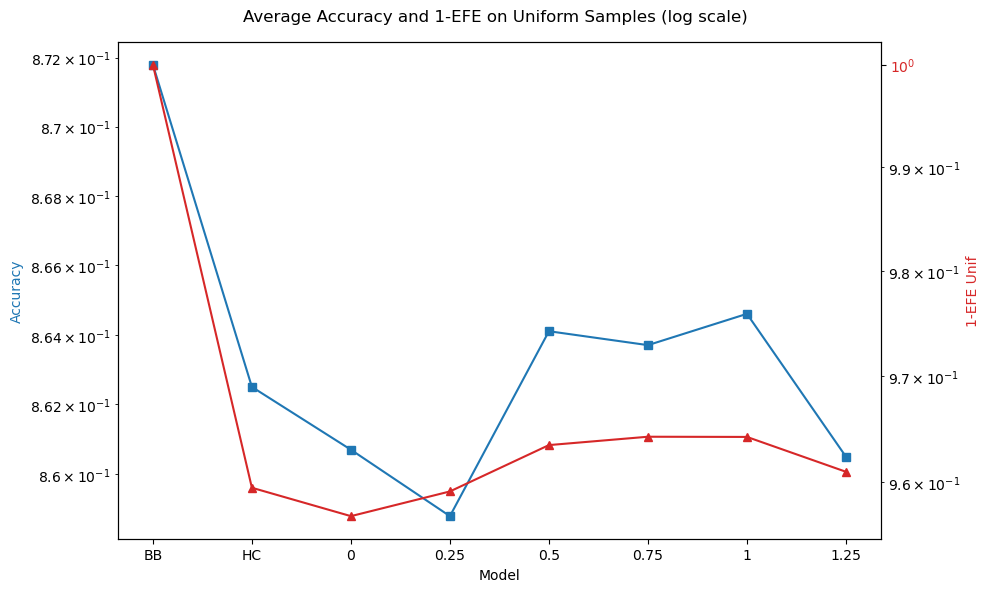


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB          0.8718        0.000000    1.000000
   HC          0.8625        0.040553    0.959447
    0          0.8607        0.043215    0.956785
 0.25          0.8588        0.040900    0.959100
  0.5          0.8641        0.036541    0.963459
 0.75          0.8637        0.035753    0.964247
    1          0.8646        0.035772    0.964228
 1.25          0.8605        0.039053    0.960947


In [29]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS3_1_3_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

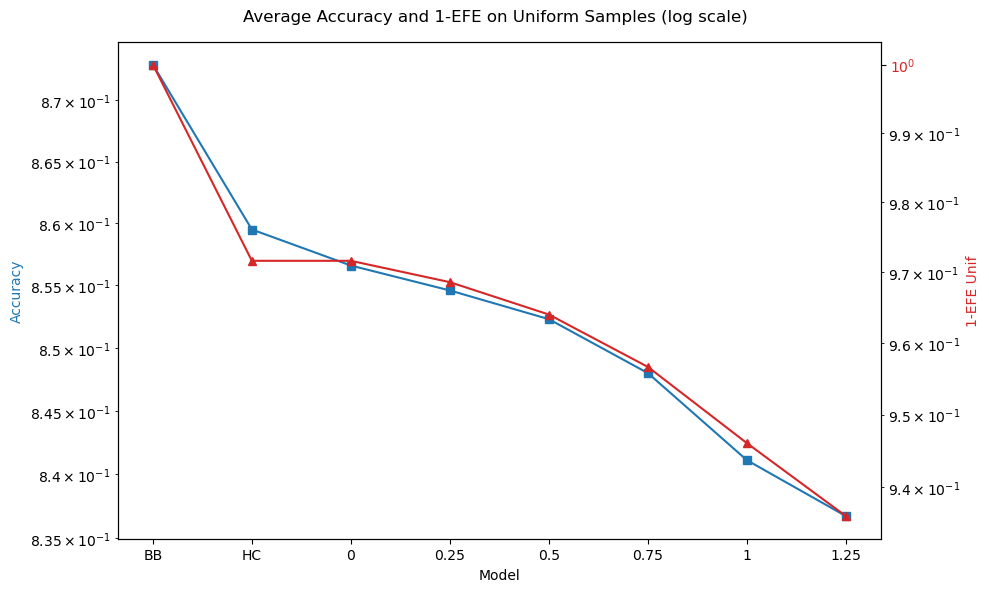


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB          0.8729        0.000000    1.000000
   HC          0.8595        0.028344    0.971656
    0          0.8566        0.028345    0.971655
 0.25          0.8546        0.031384    0.968616
  0.5          0.8523        0.035966    0.964034
 0.75          0.8480        0.043339    0.956661
    1          0.8411        0.053968    0.946032
 1.25          0.8367        0.064029    0.935971


In [30]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS3_1_4_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

### Black box 2: Gradient Boosting classifier

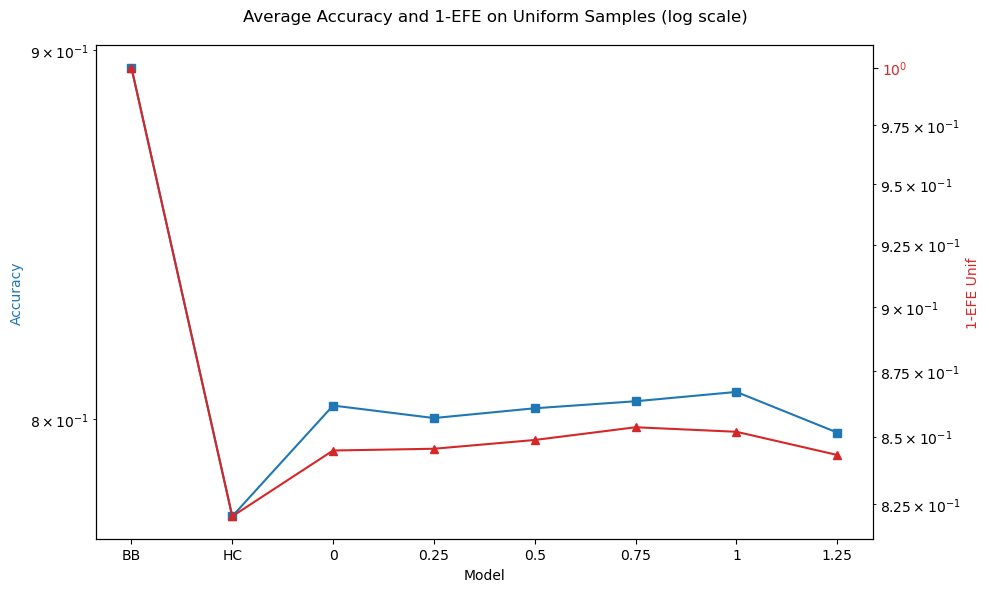


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB          0.8950        0.000000    1.000000
   HC          0.7756        0.179294    0.820706
    0          0.8035        0.155177    0.844823
 0.25          0.8003        0.154523    0.845477
  0.5          0.8028        0.151248    0.848752
 0.75          0.8046        0.146478    0.853522
    1          0.8070        0.148176    0.851824
 1.25          0.7966        0.156832    0.843168


In [31]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS3_2_1_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

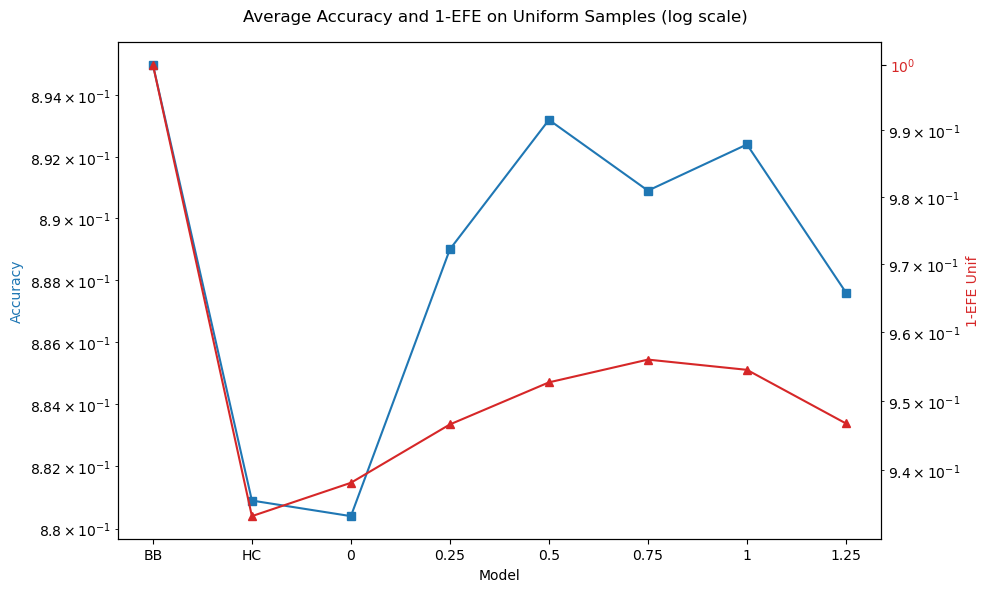


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB          0.8950        0.000000    1.000000
   HC          0.8809        0.066583    0.933417
    0          0.8804        0.061820    0.938180
 0.25          0.8890        0.053427    0.946573
  0.5          0.8932        0.047332    0.952668
 0.75          0.8909        0.044019    0.955981
    1          0.8924        0.045510    0.954490
 1.25          0.8876        0.053288    0.946712


In [32]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS3_2_2_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

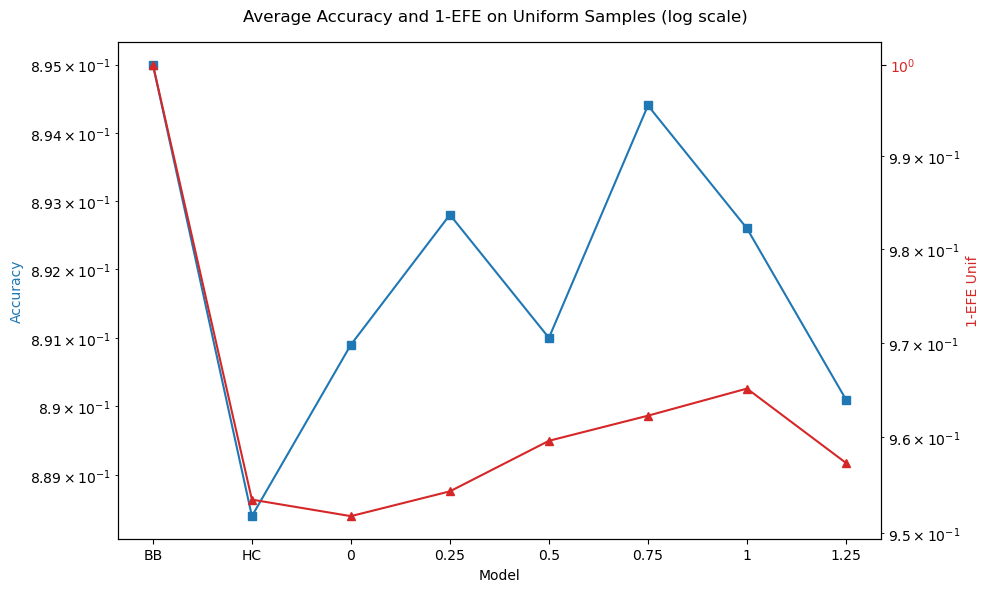


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB          0.8950        0.000000    1.000000
   HC          0.8884        0.046518    0.953482
    0          0.8909        0.048242    0.951758
 0.25          0.8928        0.045654    0.954346
  0.5          0.8910        0.040357    0.959643
 0.75          0.8944        0.037715    0.962285
    1          0.8926        0.034854    0.965146
 1.25          0.8901        0.042677    0.957323


In [33]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS3_2_3_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

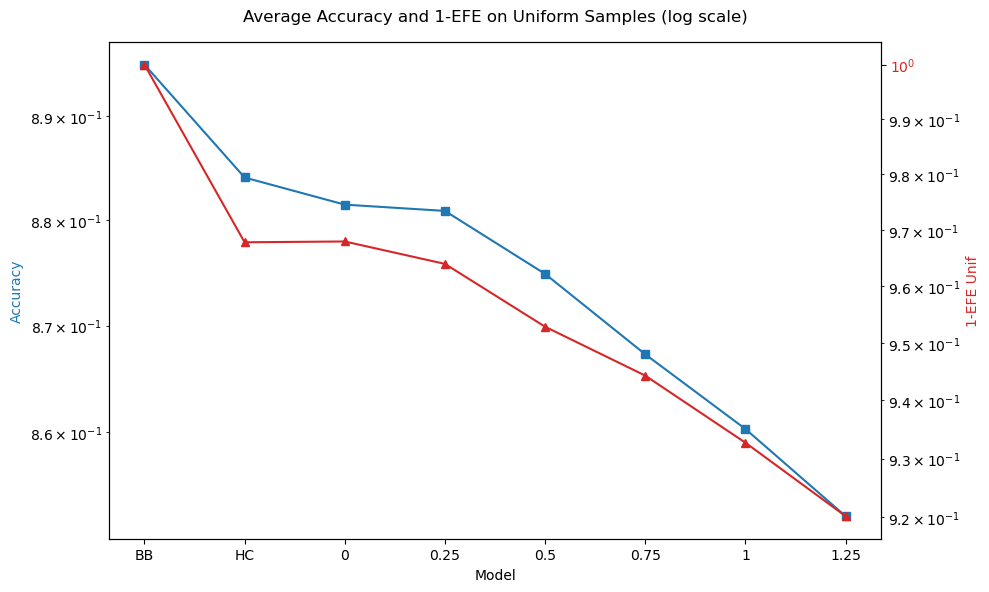


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB          0.8950        0.000000    1.000000
   HC          0.8841        0.032203    0.967797
    0          0.8815        0.032060    0.967940
 0.25          0.8809        0.036045    0.963955
  0.5          0.8749        0.047139    0.952861
 0.75          0.8673        0.055679    0.944321
    1          0.8603        0.067278    0.932722
 1.25          0.8522        0.079812    0.920188


In [34]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS3_2_4_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

### Black box 3: Neural Network classifier

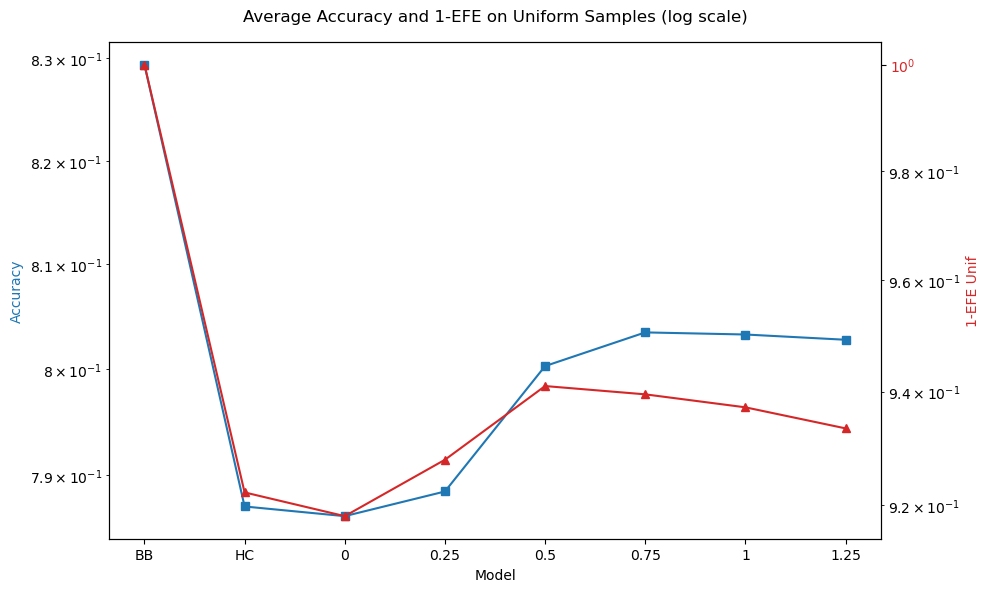


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB          0.8294        0.000000    1.000000
   HC          0.7871        0.077777    0.922223
    0          0.7862        0.081910    0.918090
 0.25          0.7885        0.072059    0.927941
  0.5          0.8003        0.059026    0.940974
 0.75          0.8035        0.060502    0.939498
    1          0.8033        0.062807    0.937193
 1.25          0.8028        0.066534    0.933466


In [35]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS3_3_1_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

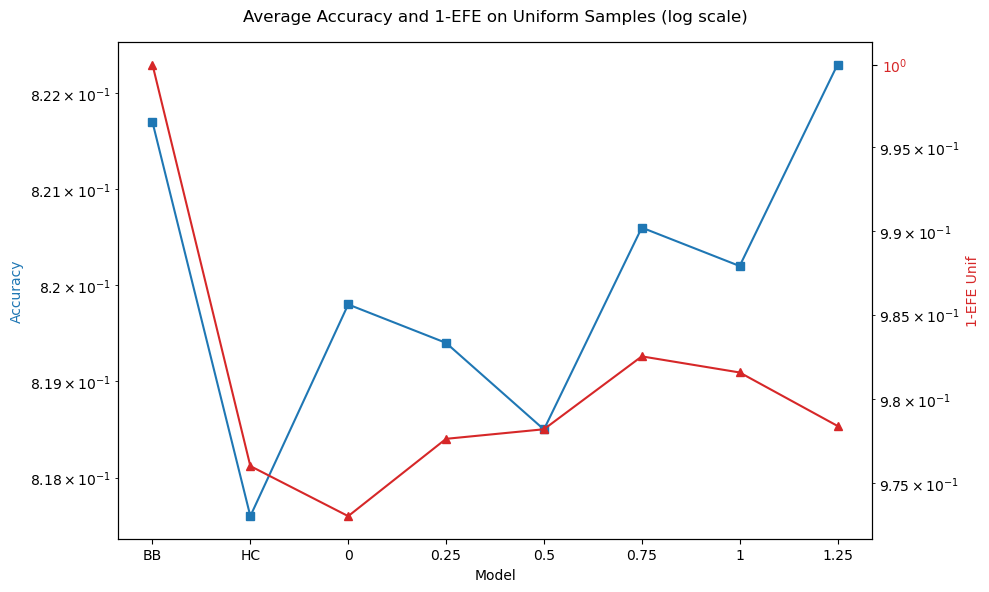


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB          0.8217        0.000000    1.000000
   HC          0.8176        0.023979    0.976021
    0          0.8198        0.026929    0.973071
 0.25          0.8194        0.022370    0.977630
  0.5          0.8185        0.021805    0.978195
 0.75          0.8206        0.017484    0.982516
    1          0.8202        0.018441    0.981559
 1.25          0.8223        0.021608    0.978392


In [36]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS3_3_2_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

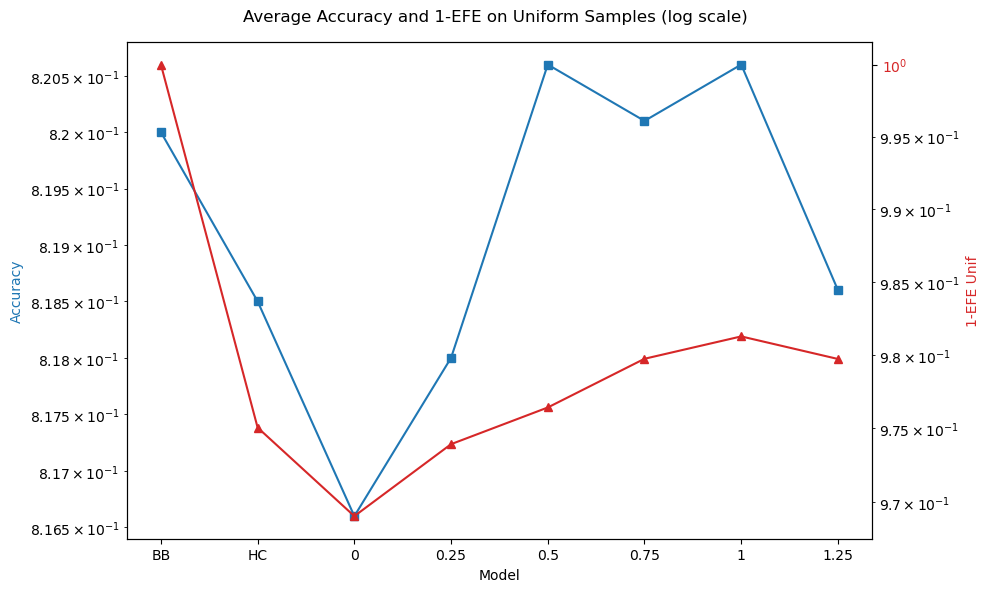


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB          0.8200        0.000000    1.000000
   HC          0.8185        0.024951    0.975049
    0          0.8166        0.030942    0.969058
 0.25          0.8180        0.026075    0.973925
  0.5          0.8206        0.023585    0.976415
 0.75          0.8201        0.020269    0.979731
    1          0.8206        0.018743    0.981257
 1.25          0.8186        0.020283    0.979717


In [37]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS3_3_3_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

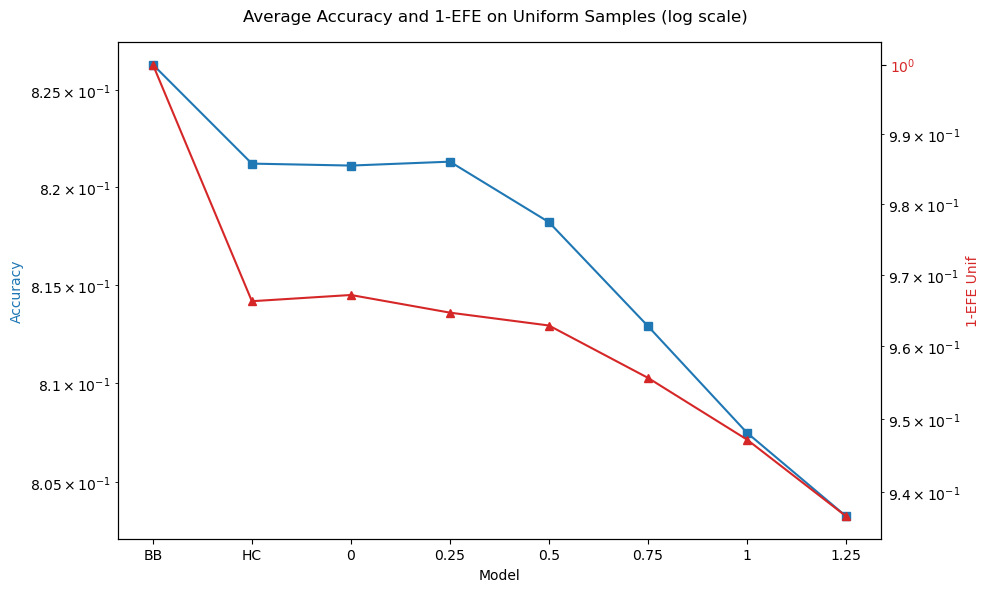


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB          0.8263        0.000000    1.000000
   HC          0.8212        0.033685    0.966315
    0          0.8211        0.032815    0.967185
 0.25          0.8213        0.035284    0.964716
  0.5          0.8182        0.037079    0.962921
 0.75          0.8129        0.044351    0.955649
    1          0.8075        0.052853    0.947147
 1.25          0.8033        0.063298    0.936702


In [38]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS3_3_4_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)